<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/Datasaurus_DarwinJoanPerezAvendano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DatasaurusDozen.tsv to DatasaurusDozen (1).tsv
User uploaded file "DatasaurusDozen.tsv" with length 65893 bytes


---
# Datasaurus

En el siguiente dataset, haremos un análisis forense de este misterioso set de datos para descubrir insights, utilizando técnicas de análisis exploratorio.

In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
soporte = pd.read_csv('DatasaurusDozen.tsv', sep='\t')

In [5]:
soporte.head(5)

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


### Análisis Exploratorio Inicial

Realice un análisis exploratorio inicial en donde pueda determinar:

- Estructura del dataframe
- Cantidad de datos
- Valores nulos
- Valores duplicados
- Outlaiers

### Estructura del dataframe

In [6]:
soporte.shape

(1846, 3)

### Cantidad de datos

In [50]:
soporte.count()

dataset    1846
x          1846
y          1846
dtype: int64

In [7]:
soporte['dataset'].value_counts()

dino          142
away          142
h_lines       142
v_lines       142
x_shape       142
star          142
high_lines    142
dots          142
circle        142
bullseye      142
slant_up      142
slant_down    142
wide_lines    142
Name: dataset, dtype: int64

In [8]:
soporte['x'].value_counts()

29.743600    4
56.666700    4
50.000000    4
67.948700    3
59.230800    3
            ..
71.867013    1
73.242002    1
68.942075    1
74.114231    1
34.583829    1
Name: x, Length: 1804, dtype: int64

In [9]:
soporte['y'].value_counts()

10.641000    6
18.333300    3
55.256400    3
46.025600    3
51.410300    3
            ..
68.479564    1
73.523719    1
81.711480    1
79.896066    1
89.588902    1
Name: y, Length: 1807, dtype: int64

### Valores nulos

In [48]:
soporte.isna().sum()

#No hay valores faltantes.

dataset    0
x          0
y          0
dtype: int64

## Valores duplicados

In [49]:
soporte.duplicated(subset = ['dataset','x','y']).sum()

#No hay valores duplicados.

0

## Variable X

### Descriptivas X

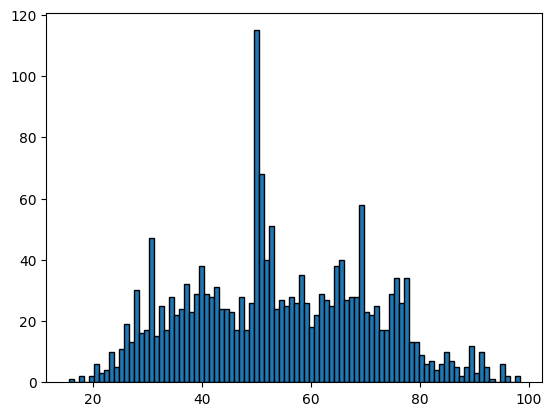

In [52]:
plt.hist(soporte['x'], bins = 90, edgecolor='black')
plt.show()

In [12]:
soporte['x'].describe()

count    1846.000000
mean       54.265695
std        16.713001
min        15.560750
25%        41.073403
50%        52.591269
75%        67.277845
max        98.288123
Name: x, dtype: float64

### Outlaier X

In [13]:
fig = px.box(soporte, y= "x")

fig.show()
#No hay valores atípicos

## Variable Y

### Descriptivas Y

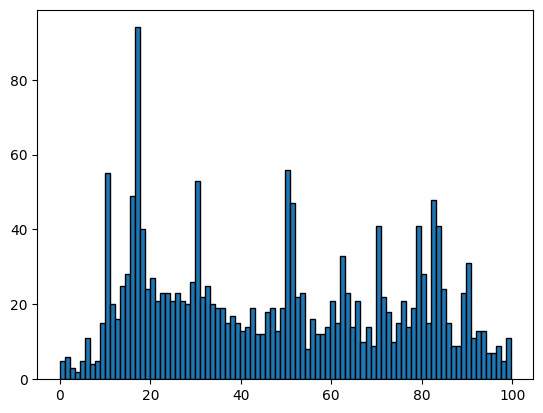

In [51]:
plt.hist(soporte['y'], bins = 90, edgecolor='black')
plt.show()

In [15]:
soporte['y'].describe()

count    1846.000000
mean       47.835099
std        26.847766
min         0.015119
25%        22.561073
50%        47.594450
75%        71.810778
max        99.694680
Name: y, dtype: float64

### Outlaier Y

In [53]:
fig = px.box(soporte, y= "y")

fig.show()

#No hay valores atípicos

# Análisis Exploratorio de Datos

In [17]:
# En el set de datos vienen distintas clases de datasets,
# estas se encuentran en la columna "dataset"
# una forma sencilla de conocer los distintos valores que vienen,
# es la siguiente

soporte['dataset'].unique()


array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [18]:
# En este primer análisis, trabajaremos con el dataset slant_down
df_slant = soporte[soporte['dataset']=='slant_down']

In [19]:
df_slant.shape

(142, 3)

## Análisis Dataset slant_down

Realice los siguientes cálculos:
* media de x
* media de y
* desviación estándar de x
* desviación estándar de y
* correlación de xy

In [20]:
df_slant['x'].mean()

54.2678488233662

In [21]:
df_slant['y'].mean()

47.835896330588206

In [22]:
x_slant = np.std(df_slant['x'])
print(x_slant)

16.707616756246523


In [23]:
y_slant = np.std(df_slant['y'])
print(y_slant)

26.841091919765944


In [24]:
np.corrcoef(df_slant['x'], df_slant['y'])[0,1]

-0.06897973536063176

In [54]:
df_slant['x'].corr(df_slant['y'], method='pearson')

-0.06897973536063176

In [59]:
print('Correlación Pearson: ', df_slant['x'].corr(df_slant['y'], method='pearson'))
print('Correlación spearman: ',df_slant['x'].corr(df_slant['y'], method='spearman'))
print('Correlación kendall: ',df_slant['x'].corr(df_slant['y'], method='kendall'))

Correlación Pearson:  -0.06897973536063176
Correlación spearman:  -0.06693546190099982
Correlación kendall:  -0.07541704125461991


## Análisis Dataset dino

Repita el mismo análisis con el dataset dino

In [26]:
df_dino = soporte[soporte['dataset']=='dino']

In [27]:
df_dino.shape

(142, 3)

In [28]:
df_dino['x'].mean()

54.26327323943662

In [29]:
df_dino['y'].mean()

47.832252816901416

In [30]:
x_dino = np.std(df_dino['x'])
print(x_dino)

16.70600555135667


In [31]:
y_dino = np.std(df_dino['y'])
print(y_dino)

26.840392949306764


In [60]:
print('Correlación Pearson: ', df_dino['x'].corr(df_dino['y'], method='pearson'))
print('Correlación spearman: ',df_dino['x'].corr(df_dino['y'], method='spearman'))
print('Correlación kendall: ',df_dino['x'].corr(df_dino['y'], method='kendall'))

Correlación Pearson:  -0.06447185270095167
Correlación spearman:  -0.06510904080429955
Correlación kendall:  -0.04831257557516116


## Análisis Dataset star

Repita el mismo análisis con el dataset star

In [33]:
df_star = soporte[soporte['dataset']=='star']

In [34]:
df_star.shape

(142, 3)

In [35]:
df_star['x'].mean()

54.26734110449506

In [36]:
df_star['y'].mean()

47.839545225097886

In [37]:
x_star = np.std(df_star['x'])
print(x_star)

16.709809264004765


In [38]:
y_star = np.std(df_slant['y'])
print(y_star)

26.841091919765944


In [61]:
print('Correlación Pearson: ', df_star['x'].corr(df_star['y'], method='pearson'))
print('Correlación spearman: ',df_star['x'].corr(df_star['y'], method='spearman'))
print('Correlación kendall: ',df_star['x'].corr(df_star['y'], method='kendall'))

Correlación Pearson:  -0.06296110022682305
Correlación spearman:  -0.05144480931115633
Correlación kendall:  -0.03246428928179003


# Análisis y Conclusiones

Aparentemente, este misterioso set de datos esconde algunos misterios... ¿Se podrá concluir que cada dataset contiene los mismos datos, o al menos son datos muy similares?

In [64]:
# Responda acá
print("Dataset 'slant_down")
df_slant.describe()

Dataset 'slant_down


,x,y
count,142.000000,142.000000
mean,54.267849,47.835896
std,16.766759,26.936105
min,18.109472,0.303872
25%,42.890931,27.840858
50%,53.135159,46.401314
75%,64.469989,68.439430
max,95.593416,99.644179


In [65]:
print("Dataset 'star")
df_star.describe()

Dataset 'star


,x,y
count,142.000000,142.000000
mean,54.267341,47.839545
std,16.768959,26.930275
min,27.024603,14.365590
25%,41.034210,20.374135
50%,56.534732,50.110554
75%,68.711493,63.548584
max,86.435897,92.214989


In [66]:
print("Dataset 'dino")
df_dino.describe()

Dataset 'dino


,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


**R.-** _Los datos son muy similares, pero no iguales ya que cambian sus decimales y eso altera la intepretación de sus estadísticos_.

Considere extender el análisis exploratorio para corroborar o refutar la aseveración anterior

In [ ]:
subset = df_slant.append(df_dino, ignore_index = True)
subset = subset.append(df_star, ignore_index = True)

In [84]:
subset['dataset'].value_counts()

slant_down    142
dino          142
star          142
Name: dataset, dtype: int64

<Axes: xlabel='x', ylabel='Density'>

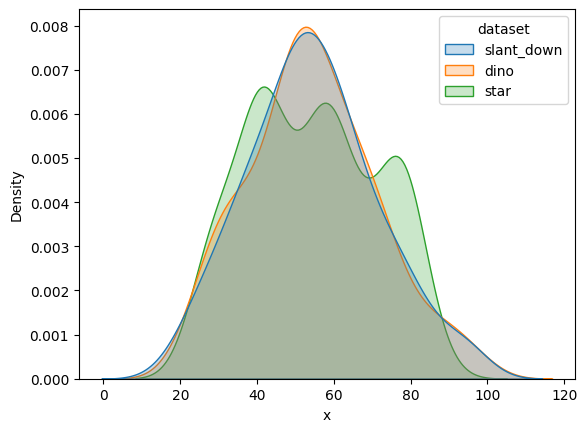

In [104]:
#Distribución de probabilidad
sns.kdeplot(data = subset, x = "x", hue = "dataset" , fill=True, alpha = 0.25)

<Axes: xlabel='y', ylabel='Density'>

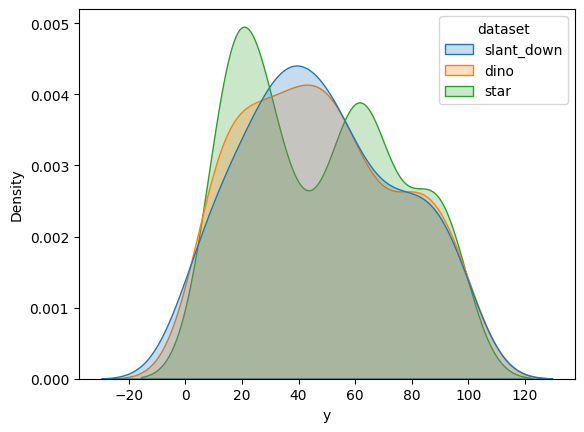

In [105]:
sns.kdeplot(data = subset, x = "y", hue = "dataset" , fill=True, alpha = 0.25)

<Axes: xlabel='dataset', ylabel='x'>

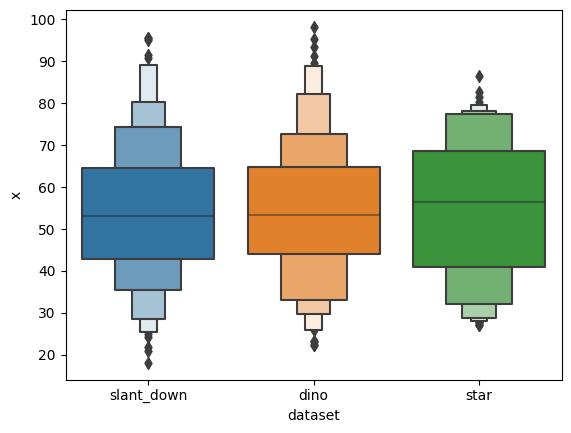

In [117]:
sns.boxenplot(data = subset , y = "x", x = "dataset", orient = "v")

<Axes: xlabel='dataset', ylabel='y'>

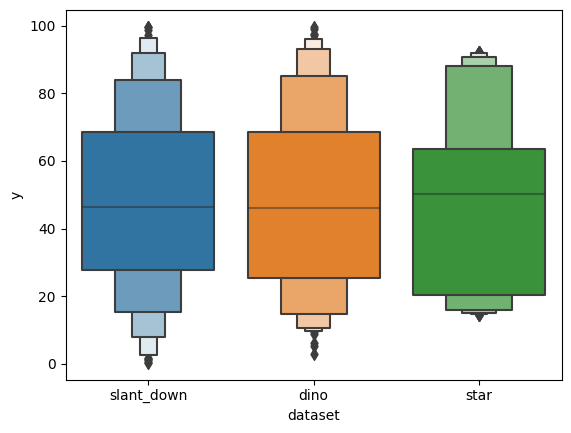

In [114]:
sns.boxenplot(data = subset , y = "y", x = "dataset", orient = "v")

Realice un análisis visual de los datasets anteriores

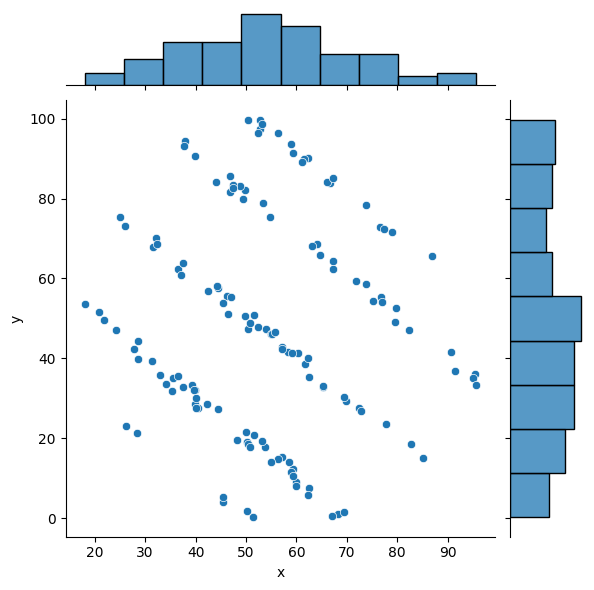

In [121]:
sns.jointplot(data = df_slant, x = 'x', y ='y')

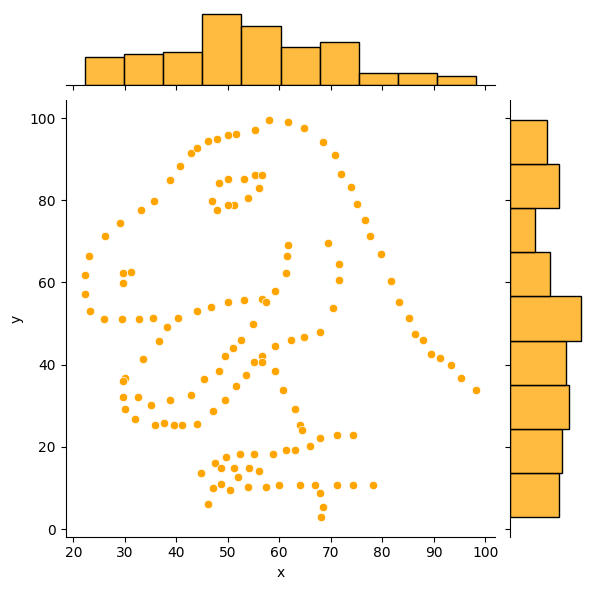

In [123]:
sns.jointplot(data = df_dino, x = 'x', y ='y', color = 'orange')

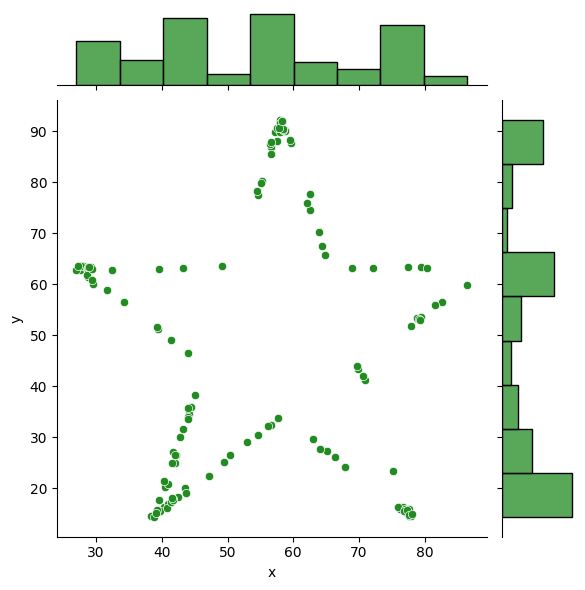

In [124]:
sns.jointplot(data = df_star, x = 'x', y ='y', color ='forestgreen')

¿Qué hallazgos ha encontrado que sean relevantes?

**R.-** _Se puede concluir que confiar solo en resúmenes de datos como **medias, varianzas y correlaciones** puede ser **peligroso**, porque conjuntos de datos muy diferentes pueden dar resultados similares lo cual es una demostración de la importancia de **mirar gráficamente** los conjuntos de datos antes de analizarlos_.